In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_var
from models.cmlp import cMLP, cMLPSparse, train_model_ista, train_unregularized
from models.clstm import cLSTM, train_model_ista

In [2]:
# For GPU acceleration
device = torch.device('cuda')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/chanyoung/Desktop/CausalDiscoveryToolbox-master/CausalDiscoveryToolbox-master/sachs.csv')

In [5]:
data = df.values

In [26]:
X = torch.tensor(data[np.newaxis], dtype=torch.float32, device=device)

In [27]:
X.shape

torch.Size([1, 7466, 11])

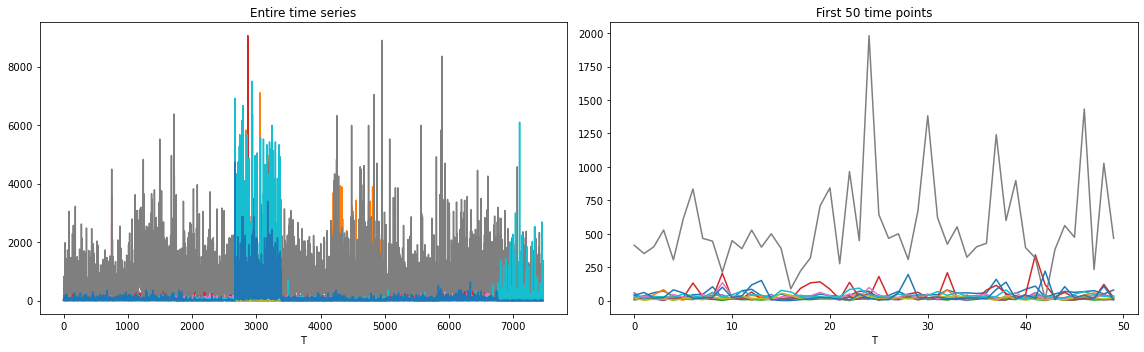

In [8]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(data)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(data[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

In [31]:
# Set up model
clstm = cLSTM(X.shape[-1], hidden=100).cuda(device=device)